In [1]:
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
import sklearn.datasets as dt
import seaborn as sns         
import numpy as np
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


In [2]:
def mapData(dist_matrix, X, y, metric, title):
    mds = MDS(metric=metric, dissimilarity='precomputed', random_state=0)
    # Get the embeddings
    pts = mds.fit_transform(dist_matrix)
    # Plot the embedding, colored according to the class of the points
    fig = plt.figure(2, (15,6))
    ax = fig.add_subplot(1,2,1)    
    ax = sns.scatterplot(x=pts[:, 0], y=pts[:, 1],
                         hue=y, palette=['r', 'g', 'b', 'c'])

    # Add the second plot
    ax = fig.add_subplot(1,2,2)
    # Plot the points again
    plt.scatter(pts[:, 0], pts[:, 1])
    
    # Annotate each point by its corresponding face image
    for x, ind in zip(X, range(pts.shape[0])):
        im = x.reshape(64,64)
        imagebox = OffsetImage(im, zoom=0.3, cmap=plt.cm.gray)
        i = pts[ind, 0]
        j = pts[ind, 1]
        ab = AnnotationBbox(imagebox, (i, j), frameon=False)
        ax.add_artist(ab)
    plt.title(title)    
    plt.show()


In [3]:
faces = dt.fetch_olivetti_faces()
X_faces = faces.data
y_faces = faces.target
ind = y_faces < 4
X_faces = X_faces[ind,:]
y_faces = y_faces[ind]


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


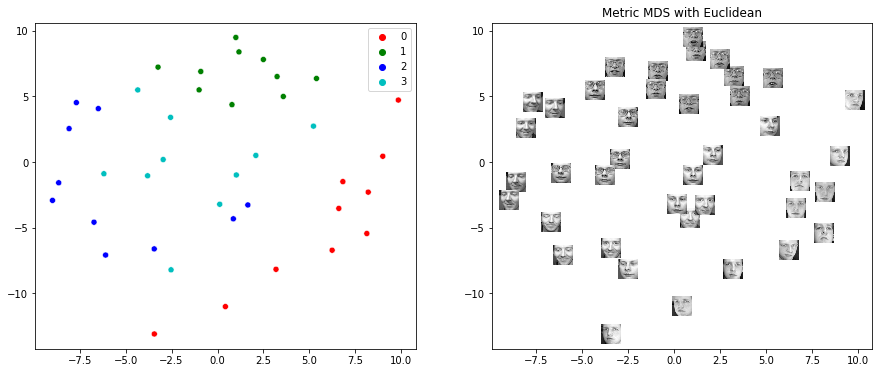

In [4]:
dist_euclid = euclidean_distances(X_faces)
mapData(dist_euclid, X_faces, y_faces, True, 
        'Metric MDS with Euclidean')


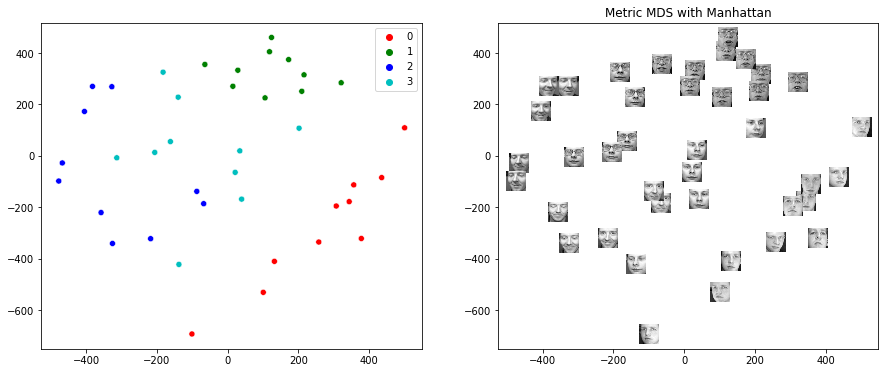

In [5]:
dist_L1 = manhattan_distances(X_faces)
mapData(dist_L1, X_faces, y_faces, True, 
        'Metric MDS with Manhattan')
